<a href="https://colab.research.google.com/github/YashasaveeKesarwani99/Machine-Learning-Algo/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

uploaded = files.upload()

Saving tested.csv to tested.csv


In [4]:

import io

data = pd.read_csv(io.BytesIO(uploaded['tested.csv']))
data = data.iloc[1:900,:]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


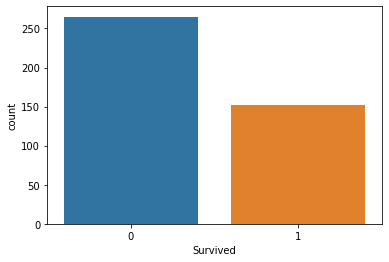

In [ ]:
# Analyzing dataset

sns.countplot(x="Survived", data=data)

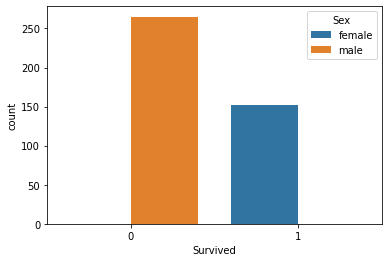

In [ ]:
sns.countplot(x="Survived", hue="Sex", data=data) # more females survived

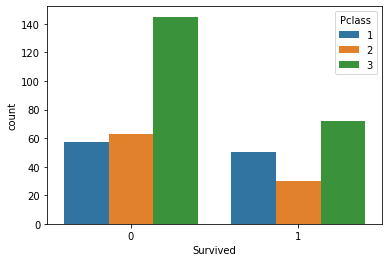

In [ ]:
sns.countplot(x="Survived" ,hue="Pclass", data=data ) # survival of third class passenger was least

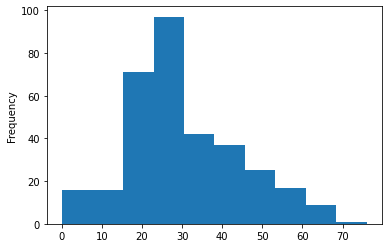

In [ ]:
data["Age"].plot.hist() 

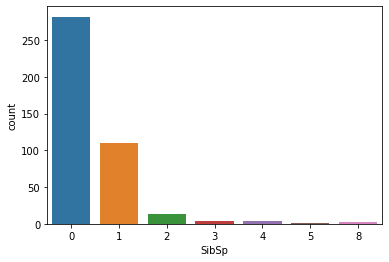

In [ ]:
sns.countplot(x="SibSp", data=data) # majority of them were not siblings

In [5]:
# Data cleaning

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          326
Embarked         0
dtype: int64

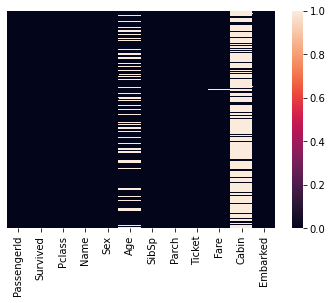

In [7]:
sns.heatmap(data.isnull(), yticklabels=False)

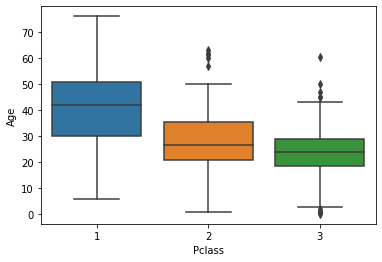

In [8]:
sns.boxplot(x="Pclass", y="Age", data=data)

In [15]:
data.dropna(inplace=True) # To actually edit the original DataFrame, the “inplace” parameter can be set to True
data.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# Handling categorical datas

sex = pd.get_dummies(data["Sex"], drop_first=True)
sex.head()

,male
1,0
2,1
3,1
4,0
5,1


In [19]:
embark = pd.get_dummies(data["Embarked"], drop_first=True)
pclass = pd.get_dummies(data['Pclass'], drop_first=True)
data = pd.concat([data,sex,embark,pclass], axis=1)

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S,1,0,1,0,1


In [27]:

data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
1,1,47.0,1,0,7.0000,0,0,1,0,1
2,0,62.0,0,0,9.6875,1,1,0,1,0
3,0,27.0,0,0,8.6625,1,0,1,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,1
5,0,14.0,0,0,9.2250,1,0,1,0,1


In [29]:
# Train data

X = data.drop("Survived", axis=1)
Y = data["Survived"]

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size = 0.3, random_state = 2)

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(train_x,train_y)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
reg.score(test_x,test_y)

1.0

This module predicts whether the passenger of Titanic will die or will he survive using logistic regression